In [162]:
import tensorflow as tf
import numpy as np
import glob
import os
import sys
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize 
%matplotlib inline

import dcgan_model
import dcgan_utils
import dcgan_ops
import celebA_estimators


In [163]:
# define the graph
sess = tf.Session()
#z = tf.placeholder(tf.float32, shape=[64, 100], name = 'z')
a = np.zeros((64, 100))
a[0][0] = 1
a = a.astype(dtype='float32')
z = tf.Variable(a, name='z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

In [164]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [165]:
# generate images
#feed_dict = {z : np.random.randn(64, 100)}
feed_dict = {z : a}

x_hat_val = sess.run(x_hat, feed_dict=feed_dict)

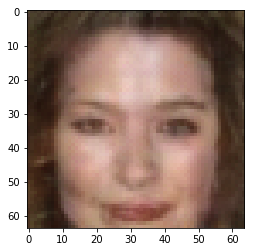

In [166]:
# inspect
im_idx = 3
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

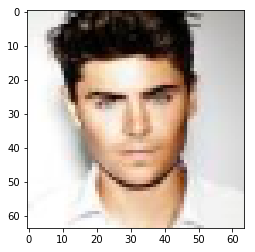

In [167]:
# Get Zac Efron's picture and resize to 64x64x3
#zefron = io.imread('/Users/shammakabir/Downloads/zac.jpeg')
zefron = io.imread('/Users/anthonydepalatis/Downloads/images.jpeg')
zefron = resize(zefron, (64, 64, 3))
plt.imshow(zefron)

In [168]:
64 * 64 * 3

12288

In [169]:
''' Reshape the images into vectors and define loss function. '''
zefron_vec = zefron.reshape(12288,1)
test_vec1 = dcgan_utils.inverse_transform(x_hat_val[im_idx, :]).reshape(12288, 1)
zefron_vec = tf.Variable(zefron_vec, dtype=tf.float32)
test_vec1 = tf.Variable(test_vec1)

('starting at', 'x:', array([[ 0.3200897 ],
       [ 0.27759814],
       [ 0.19826281],
       ..., 
       [ 0.21775946],
       [ 0.15628704],
       [ 0.1022251 ]], dtype=float32), 'squared loss:', 2980.3935606357381)
ending at x: [[ 0.62082916]
 [ 0.60938728]
 [ 0.56187648]
 ..., 
 [ 0.5794934 ]
 [ 0.5487572 ]
 [ 0.51780468]] squared loss: 8.29388641099e-11


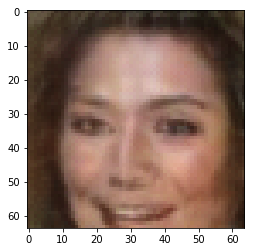

In [208]:
squared_diff = tf.square(tf.cast(zefron_vec, tf.float64) - tf.cast(test_vec1, tf.float64))
squared_loss = tf.reduce_sum(squared_diff)
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(squared_loss)
init = tf.global_variables_initializer()

def optimize():
    sess.run(init)
    print("starting at", "x:", sess.run(test_vec1), "squared loss:", sess.run(squared_loss))
    for step in range(1000):  
        sess.run(train)
        sess.run(test_vec1)
        sess.run(squared_loss)
        #print("step", step, "x:", sess.run(test_vec), "squared loss:", sess.run(squared_loss))
    print "ending at", "x:", sess.run(test_vec1), "squared loss:", sess.run(squared_loss)
optimize()

# Create a Tensor for the optimized vector.
vec_na = sess.run(tf.reshape(test_vec1, [64,64,3], name='test_vec1'))

# Resize the vector for the generator and run it through again.
vec_na.resize(64, 100)
z = tf.Variable(vec_na, name='z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)
feed_dict = {z : vec_na}
x_hat_val = sess.run(x_hat, feed_dict=feed_dict)
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

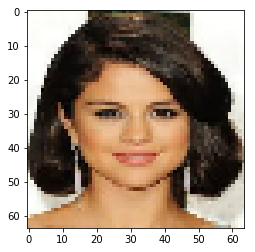

In [190]:
# Get Selena Gomez's picture and resize to 64x64x3
#selena = io.imread('/Users/shammakabir/Downloads/selena.jpg')
selena = io.imread('/Users/anthonydepalatis/Downloads/selena_gomez.jpg')
selena = resize(selena, (64, 64, 3))
plt.imshow(selena)

('starting at', 'x:', array([[ 0.3200897 ],
       [ 0.27759814],
       [ 0.19826281],
       ..., 
       [ 0.21775946],
       [ 0.15628704],
       [ 0.1022251 ]], dtype=float32), 'squared loss:', 2135.7244982937173)
ending at x: [[ 0.3200897 ]
 [ 0.27759814]
 [ 0.19826281]
 ..., 
 [ 0.21775946]
 [ 0.15628704]
 [ 0.1022251 ]] squared loss: 5.65697072519e-11


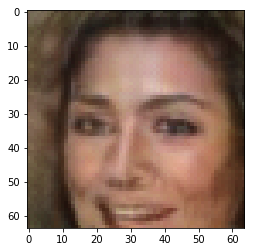

In [209]:
''' Reshape the images into vectors and define loss function. '''
selena_vec = selena.reshape(12288,1)
test_vec2 = dcgan_utils.inverse_transform(x_hat_val[im_idx, :]).reshape(12288, 1)
selena_vec = tf.Variable(selena_vec, dtype=tf.float32)
test_vec2 = tf.Variable(test_vec2)

squared_diff = tf.square(tf.cast(selena_vec, tf.float64) - tf.cast(test_vec2, tf.float64))
squared_loss = tf.reduce_sum(squared_diff)
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(squared_loss)
init = tf.global_variables_initializer()

optimize()

# Um...?
#print sess.run(tf.reshape(test_vec, [64,64,3], name='test_vec'))
vec_na2 = sess.run(tf.reshape(test_vec2, [64,64,3], name='test_vec2'))

# Resize the vector for the generator and run it through again.
vec_na2.resize(64, 100)
z = tf.Variable(vec_na2, name='z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)
feed_dict = {z : vec_na2}
x_hat_val = sess.run(x_hat, feed_dict=feed_dict)
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

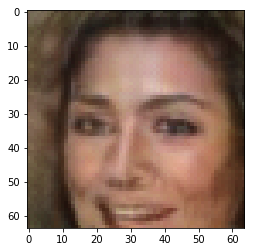

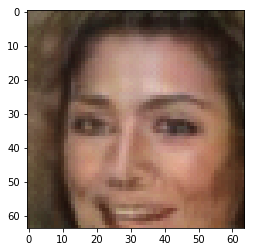

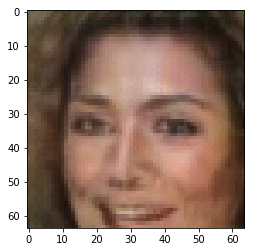

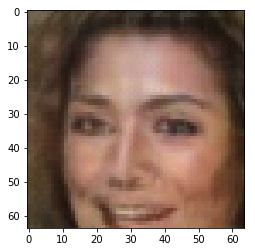

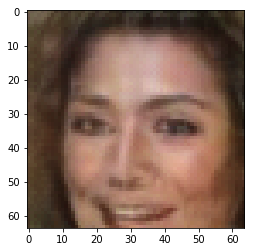

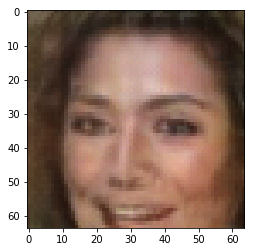

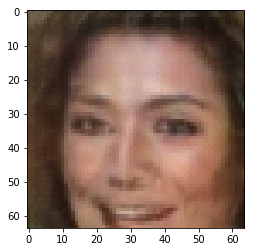

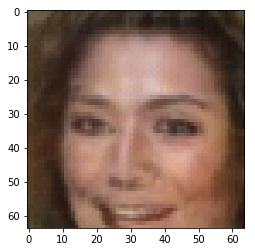

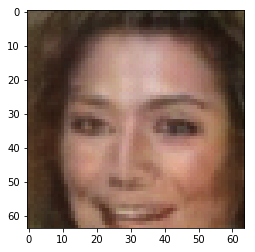

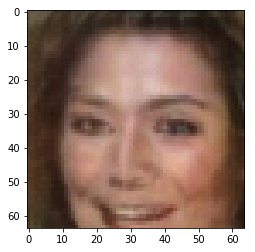

In [215]:
''' Problem 4 '''
for x in np.arange(0, 1, 0.1):
    change = x*vec_na + (1 - x)*vec_na2
    
    z = tf.Variable(change, name='z')
    x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)
    restorer = tf.train.Saver(var_list=restore_dict)
    restorer.restore(sess, restore_path)
    feed_dict = {z : change}
    x_hat_val = sess.run(x_hat, feed_dict=feed_dict)

    #feed_dict = {z : sess.run(change)}
    #x_hat_val = sess.run(x_hat, feed_dict=feed_dict)
    im_idx = 3
    plt.figure().add_subplot(111).imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))
    
#    plt.figure().add_subplot(111).imshow(sess.run(change))

In [39]:
# clean up
sess.close()

# Apply discriminator

In [350]:
# define the graph
sess = tf.Session()
x_hat = tf.placeholder(tf.float32, shape = [1, 64*64*3], name='x_hat')
d_loss, restore_dict, restore_path = celebA_estimators.dcgan_discrim(x_hat, sess)

In [351]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [352]:
# apply on random images
for _ in range(10):
    x_hat_val = np.reshape(2*np.random.random((1, 64, 64, 3)) - 1, [1, -1])
    feed_dict = {x_hat: x_hat_val}
    d_loss_val = sess.run(d_loss, feed_dict=feed_dict)
    print np.exp(-d_loss_val)

[ 1.]
[ 0.99999821]
[ 1.]
[ 1.]
[ 1.]
[ 0.99974221]
[ 0.99999154]
[ 1.]
[ 1.]
[ 1.]


In [353]:
image_paths = glob.glob(os.path.join("../data", 'celebA', "*.jpg"))
image_paths.sort()
image_paths = image_paths[:64]
images = [dcgan_utils.get_image(image_path, 108) for image_path in image_paths]

In [354]:
len(images)

64

In [355]:
# Apply on one image
im_idx = 12
x_hat_val = images[im_idx].reshape([1, -1])
feed_dict = {x_hat: x_hat_val}
d_loss_val = sess.run(d_loss, feed_dict=feed_dict)

[ 0.9087922]


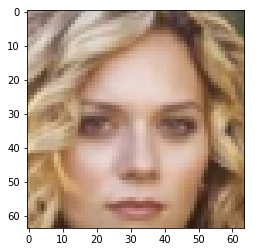

In [356]:
# inspect
plt.imshow(dcgan_utils.inverse_transform(images[im_idx]))
print np.exp(-d_loss_val)


In [357]:
# clean up
sess.close()

In [98]:
x = tf.Variable(2, name='x', dtype=tf.float32)
log_x = tf.log(x)
log_x_squared = tf.square(log_x)

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(log_x_squared)

init = tf.initialize_all_variables()

def optimize():
  with tf.Session() as session:
    session.run(init)
    print("starting at", "x:", session.run(x), "log(x)^2:", session.run(log_x_squared))
    for step in range(10):  
      session.run(train)
      print("step", step, "x:", session.run(x), "log(x)^2:", session.run(log_x_squared))
        

optimize()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
('starting at', 'x:', 2.0, 'log(x)^2:', 0.48045301)
('step', 0, 'x:', 1.6534264, 'log(x)^2:', 0.25285786)
('step', 1, 'x:', 1.3493005, 'log(x)^2:', 0.089751966)
('step', 2, 'x:', 1.1272696, 'log(x)^2:', 0.014351669)
('step', 3, 'x:', 1.0209966, 'log(x)^2:', 0.0004317743)
('step', 4, 'x:', 1.0006447, 'log(x)^2:', 4.1534943e-07)
('step', 5, 'x:', 1.0000006, 'log(x)^2:', 3.5527118e-13)
('step', 6, 'x:', 1.0, 'log(x)^2:', 0.0)
('step', 7, 'x:', 1.0, 'log(x)^2:', 0.0)
('step', 8, 'x:', 1.0, 'log(x)^2:', 0.0)
('step', 9, 'x:', 1.0, 'log(x)^2:', 0.0)
